In [3]:
import pandas as pd

df = pd.read_csv('Attrition Data (1).csv')

left_employees = df[df['Attrition'] == 'Yes']

mean_age_by_department = left_employees.groupby('Department')['Age'].mean()

print(mean_age_by_department)


Department
Human Resources           30.083333
Research & Development    33.473684
Sales                     34.260870
Name: Age, dtype: float64


In [5]:

mode_distance_by_department = df.groupby('Department')['DistanceFromHome'].apply(lambda x: x.mode().iloc[0])

print(mode_distance_by_department)


Department
Human Resources           2
Research & Development    1
Sales                     2
Name: DistanceFromHome, dtype: int64


In [7]:
avg_salary_by_dept_status = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean()

print(avg_salary_by_dept_status)


Department              Attrition
Human Resources         No           7345.980392
                        Yes          3715.750000
Research & Development  No           6630.326087
                        Yes          4108.075188
Sales                   No           7232.240113
                        Yes          5908.456522
Name: MonthlyIncome, dtype: float64


In [11]:
Median_value = df.groupby('MaritalStatus')['JobSatisfaction'].median()
print(Median_value)


MaritalStatus
Divorced    3.0
Married     3.0
Single      3.0
Name: JobSatisfaction, dtype: float64


In [13]:
Env_satisfaction = df.groupby('EducationField')['EnvironmentSatisfaction'].mean()
print(Env_satisfaction)

EducationField
Human Resources     2.666667
Life Sciences       2.689769
Marketing           2.723270
Medical             2.687500
Other               3.012195
Technical Degree    2.818182
Name: EnvironmentSatisfaction, dtype: float64


In [20]:
filtered = df[(df['MaritalStatus'] == 'Married') & (df['EducationField'] == 'Medical')]['WorkLifeBalance']
A = filtered.mean()
B = filtered.median()
C = filtered.mode()

print("Mean:",A)
print("Median:",B)
print("Mode:",C)

Mean: 2.7666666666666666
Median: 3.0
Mode: 0    3
Name: WorkLifeBalance, dtype: int64


In [24]:
num_of_companies = df[(df['MonthlyIncome'] >= 3000 ) & (df['Department']=='Research & Development')]['NumCompaniesWorked']
A = num_of_companies.mean()
B = num_of_companies.median()
C = num_of_companies.mode()
print("Mean:",A)
print("Median:",B)
print("Mode:",C)



Mean: 2.956060606060606
Median: 2.0
Mode: 0    1
Name: NumCompaniesWorked, dtype: int64


In [27]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

Correlation Matrix:
                                        Age  DistanceFromHome  Education  \
Age                                1.000000         -0.001686   0.208034   
DistanceFromHome                  -0.001686          1.000000   0.021042   
Education                          0.208034          0.021042   1.000000   
EnvironmentSatisfaction            0.010146         -0.016075  -0.027128   
JobSatisfaction                   -0.004892         -0.003669  -0.011296   
MonthlyIncome                      0.497855         -0.017014   0.094961   
NumCompaniesWorked                 0.299635         -0.029251   0.126317   
WorkLifeBalance                   -0.021490         -0.026556   0.009819   
YearsAtCompany                     0.311309          0.009508   0.069114   
Attrition_No                       0.159205         -0.077924   0.031373   
Attrition_Yes                     -0.159205          0.077924  -0.031373   
Department_Human Resources         0.020523         -0.012901   0.01

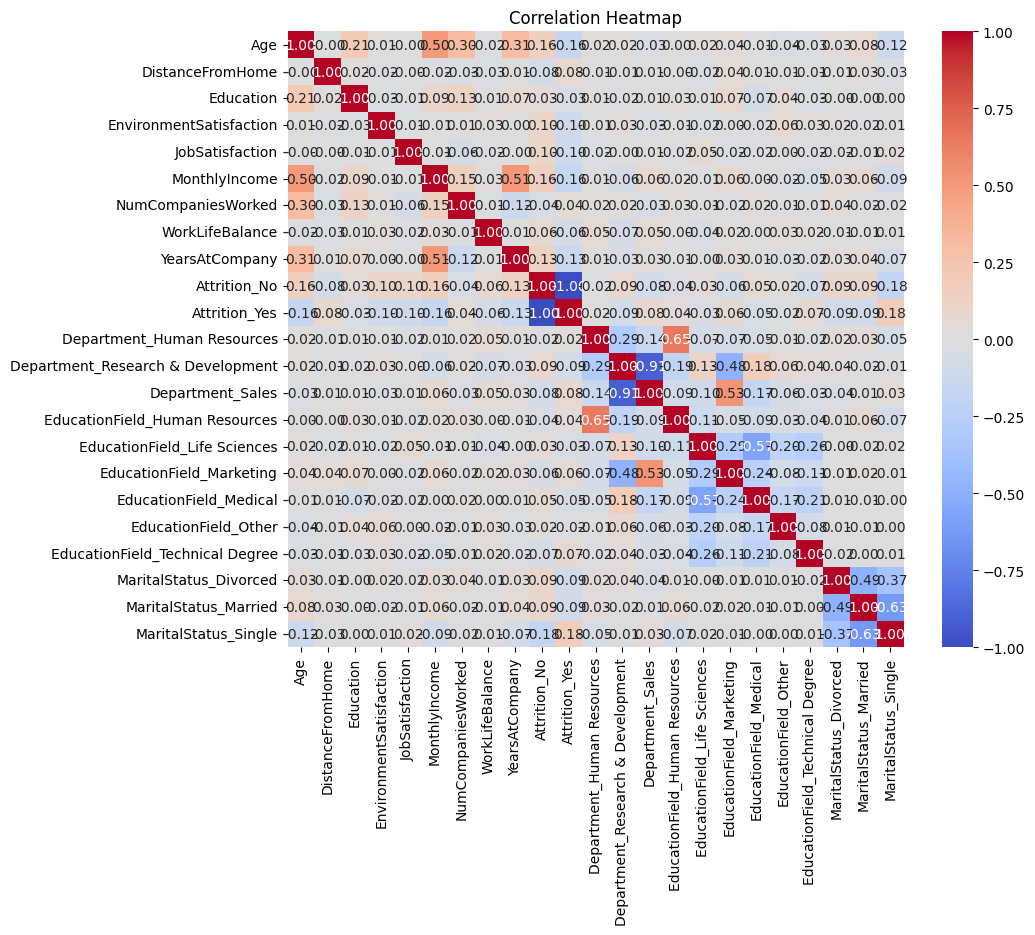

Correlation between Monthly Salary and Years Worked:                 MonthlyIncome  YearsAtCompany
MonthlyIncome        1.000000        0.514285
YearsAtCompany       0.514285        1.000000
Correlation between Monthly Salary and Age:                MonthlyIncome       Age
MonthlyIncome       1.000000  0.497855
Age                 0.497855  1.000000


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Attrition Data (1).csv')

data_encoded = pd.get_dummies(df)


matrix = data_encoded.corr()

print("Correlation Matrix:")
print(matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


salary_years = df[['MonthlyIncome','YearsAtCompany']].corr()
print("Correlation between Monthly Salary and Years Worked:", salary_years)

salary_age = df[['MonthlyIncome', 'Age']].corr()
print("Correlation between Monthly Salary and Age:", salary_age)
